In [14]:
import json 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# ======================
# GLOBAL STYLE SETTINGS
# ======================
rcParams.update({
    "font.family": "Times New Roman",
    "axes.edgecolor": "0.3",
    "axes.linewidth": 1.0,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.grid": True,
    "grid.alpha": 0.25,
    "grid.linestyle": "--",
    "font.size": 16,
    "figure.figsize": (8, 5),
    "legend.frameon": False,
    "axes.titleweight": "bold",
    "axes.labelweight": "medium",
    "figure.dpi": 150  # High-resolution output
})

# --- Define Colors ---
ours_abs_color = "#053253FF"   # deep blue
ours_exec_color = "#4090c5"  # light azure
baseline_color = "#8d1d1d"   # soft orange (compatible)
edge_color = "black"         # subtle border

model = "gpt-5"

In [15]:
# First, just print the results side by side
import json 

model = "gpt-5-mini"
with open(f"./results/{model}/_accuracies/accuracy_pddl.json", "r") as f:
    data_pddl = json.load(f)
with open(f"./results/{model}/_accuracies/accuracy_vanilla.json", "r") as f:
    data_vanilla = json.load(f)

results_vanilla, results_pddl = {}, {}
for element in data_vanilla:
    results_vanilla[element["dataset"]] = element["accuracy"]

for element in data_pddl:
    results_pddl[element["dataset"]] = element["accuracy"]

for dataset in results_vanilla:
    if dataset in results_pddl:
        print(f"{dataset}: Vanilla vs PDDL:\n\t{results_vanilla[dataset]}, {results_pddl[dataset]}")

calendar_scheduling: Vanilla vs PDDL:
	0.88, 0.9333333333333333
meeting_planning: Vanilla vs PDDL:
	0.24, 0.5333333333333333
trip_planning: Vanilla vs PDDL:
	0.02, 0.08
depots: Vanilla vs PDDL:
	0.38, 0.4666666666666667
logistics: Vanilla vs PDDL:
	0.24, 0.6666666666666666
mystery_blocksworld: Vanilla vs PDDL:
	0.36, 0.5666666666666667
obfuscated_deceptive_logistics: Vanilla vs PDDL:
	0.32, 0.5666666666666667
blocksworld_easy: Vanilla vs PDDL:
	1.0, 0.9666666666666667
blocksworld_medium: Vanilla vs PDDL:
	0.9333333333333333, 0.9333333333333333
blocksworld_hard: Vanilla vs PDDL:
	0.9666666666666667, 0.9666666666666667
blocksworld_easy_optimal: Vanilla vs PDDL:
	1.0, 0.9666666666666667
blocksworld_medium_optimal: Vanilla vs PDDL:
	0.9333333333333333, 0.9333333333333333
blocksworld_hard_optimal: Vanilla vs PDDL:
	0.9, 0.9666666666666667


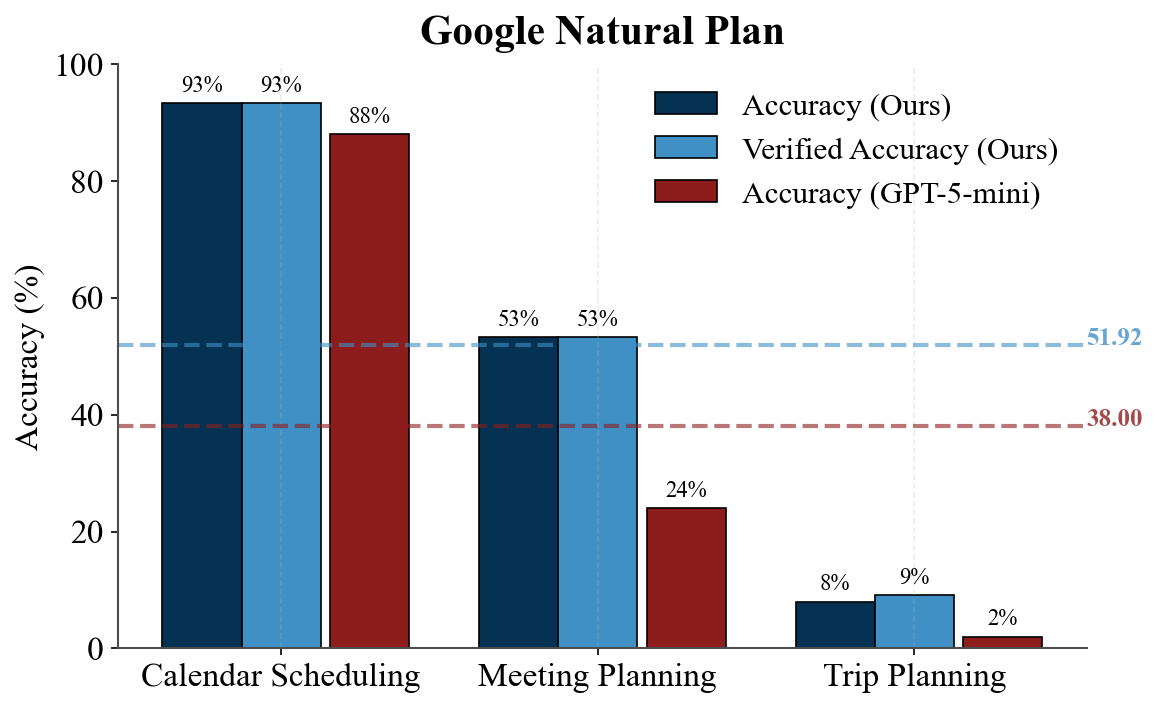

In [16]:
# ============================
# 1️⃣ Google Natural Plan Benchmark
# ============================
with open(f"./results/{model}/_accuracies/accuracy_pddl.json", "r") as f:
    data_pddl = json.load(f)
with open(f"./results/{model}/_accuracies/accuracy_vanilla.json", "r") as f:
    data_vanilla = json.load(f)
    
data_pddl = {d["dataset"]: {"accuracy": d["accuracy"], 
                            "accuracy_plan_paths_existing": d["accuracy_plan_paths_existing"]} 
             for d in data_pddl}
data_vanilla = {d["dataset"]: {"accuracy": d["accuracy"]}
                    for d in data_vanilla}

results_json_names = ["calendar_scheduling", "meeting_planning", "trip_planning"]
ours_abs, ours_exec, vanilla_acc  = [], [], []
for d_name in results_json_names:
    ours_abs.append(data_pddl[d_name]["accuracy"] * 100)
    ours_exec.append(data_pddl[d_name]["accuracy_plan_paths_existing"] * 100)
    vanilla_acc.append(data_vanilla[d_name]["accuracy"] * 100)

tasks_gnpb = ["Calendar Scheduling", "Meeting Planning", "Trip Planning"]
x = np.arange(len(tasks_gnpb))
width = 0.25

fig1, ax1 = plt.subplots()

bars1 = ax1.bar(x - width, ours_abs, width, label="Accuracy (Ours)",
                color=ours_abs_color, edgecolor=edge_color, linewidth=0.8)
bars2 = ax1.bar(x, ours_exec, width, label="Verified Accuracy (Ours)",
                color=ours_exec_color, edgecolor=edge_color, linewidth=0.8)
bars3 = ax1.bar(x + width + 0.03, vanilla_acc, width, label="Accuracy (GPT-5-mini)",
                color=baseline_color, edgecolor=edge_color, linewidth=0.8)

ax1.set_ylabel("Accuracy (%)", fontsize=16)
ax1.set_title("Google Natural Plan", fontsize=20, pad=10)
ax1.set_xticks(x)
ax1.set_xticklabels(tasks_gnpb, rotation=0, ha="center")
ax1.legend(fontsize=15)
ax1.grid(axis="y")
ax1.set_ylim(0, 100)

# Value labels
for container in [bars1, bars2, bars3]:
    ax1.bar_label(container, fmt="%.0f%%", padding=3, fontsize=11, color="black")

# Average lines
for y, c in zip(np.mean([ours_exec, vanilla_acc], axis=1),
                [ours_exec_color, baseline_color]):
    ax1.axhline(y, color=c, linestyle='--', linewidth=2, alpha=0.6)
    
    # Add value label on the line
    ax1.text(
        x=ax1.get_xlim()[1],       # place at right edge of plot
        y=y,                       # at the same height as the line
        s=f'{y:.2f}',              # format value
        color=c,                   # match line color
        fontsize=12, fontweight='bold',
        alpha=0.8
    )

plt.tight_layout()
plt.show()

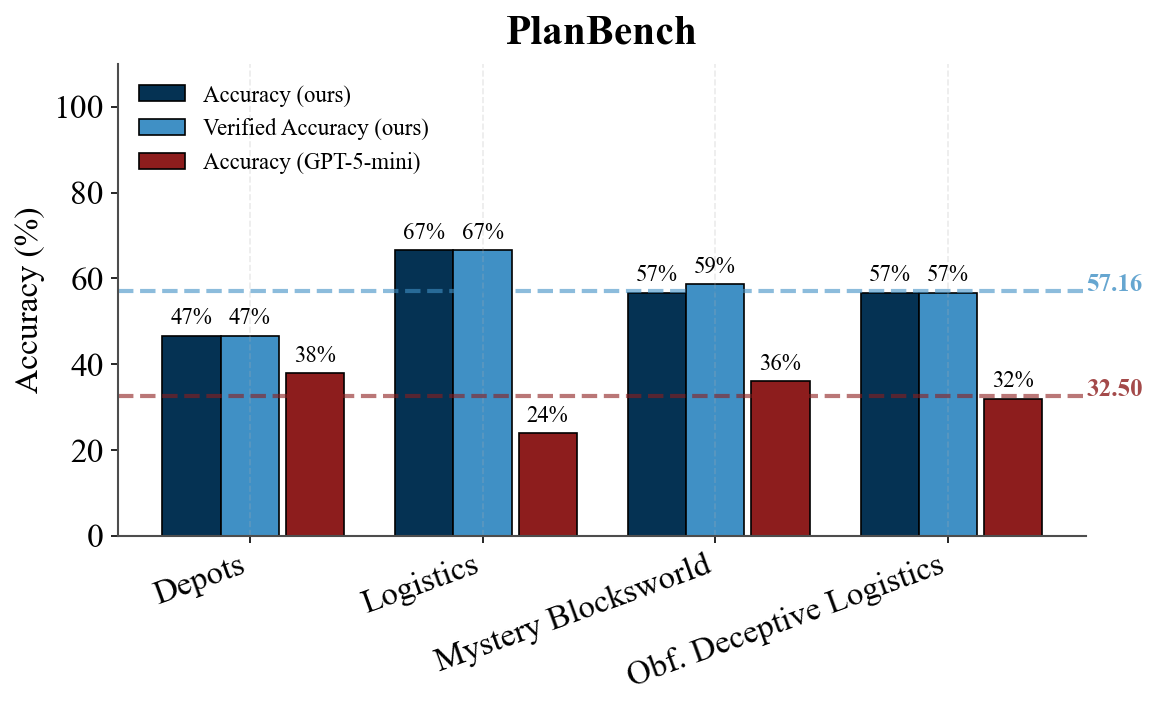

In [17]:
# ============================
# 2️⃣ PlanBench Benchmark
# ============================
with open(f"./results/{model}/_accuracies/accuracy_pddl.json", "r") as f:
    data_pddl = json.load(f)
with open(f"./results/{model}/_accuracies/accuracy_vanilla.json", "r") as f:
    data_vanilla = json.load(f)
    
data_pddl = {d["dataset"]: {"accuracy": d["accuracy"], 
                            "accuracy_plan_paths_existing": d["accuracy_plan_paths_existing"]} 
             for d in data_pddl}
data_vanilla = {d["dataset"]: {"accuracy": d["accuracy"]}
                    for d in data_vanilla}

results_json_names = ["depots", "logistics", "mystery_blocksworld", "obfuscated_deceptive_logistics"]
ours_abs, ours_exec, vanilla_acc  = [], [], []
for d_name in results_json_names:
    ours_abs.append(data_pddl[d_name]["accuracy"] * 100)
    ours_exec.append(data_pddl[d_name]["accuracy_plan_paths_existing"] * 100)
    vanilla_acc.append(data_vanilla[d_name]["accuracy"] * 100)
    
tasks_planbench = ["Depots", "Logistics", "Mystery Blocksworld", "Obf. Deceptive Logistics"]
x2 = np.arange(len(tasks_planbench))
width2 = 0.25

fig2, ax2 = plt.subplots()

bars1 = ax2.bar(x2 - width2, ours_abs, width2, label="Accuracy (ours)",
                color=ours_abs_color, edgecolor=edge_color, linewidth=0.8)
bars2 = ax2.bar(x2, ours_exec, width2, label="Verified Accuracy (ours)",
                color=ours_exec_color, edgecolor=edge_color, linewidth=0.8)
bars3 = ax2.bar(x2 + width2 + 0.03, vanilla_acc, width2, label="Accuracy (GPT-5-mini)",
                color=baseline_color, edgecolor=edge_color, linewidth=0.8)

ax2.set_ylabel("Accuracy (%)", fontsize=16)
ax2.set_title("PlanBench", fontsize=20, pad=10)
ax2.set_xticks(x2)
ax2.set_xticklabels(tasks_planbench, rotation=20, ha="right")
ax2.legend(fontsize=11, loc="upper left")
ax2.grid(axis="y")
ax2.set_ylim(0, 110)

# Value labels
for container in [bars1, bars2, bars3]:
    ax2.bar_label(container, fmt="%.0f%%", padding=3, fontsize=11, color="black")

# Average lines
for y, c in zip(np.mean([ours_exec, vanilla_acc], axis=1),
                [ours_exec_color, baseline_color]):
    ax2.axhline(y, color=c, linestyle='--', linewidth=2, alpha=0.6)
    
    # Add value label on the line
    ax2.text(
        x=ax2.get_xlim()[1],       # place at right edge of plot
        y=y,                       # at the same height as the line
        s=f'{y:.2f}',              # format value
        color=c,                   # match line color
        fontsize=12, fontweight='bold',
        alpha=0.8
    )
    
plt.tight_layout()
plt.show()

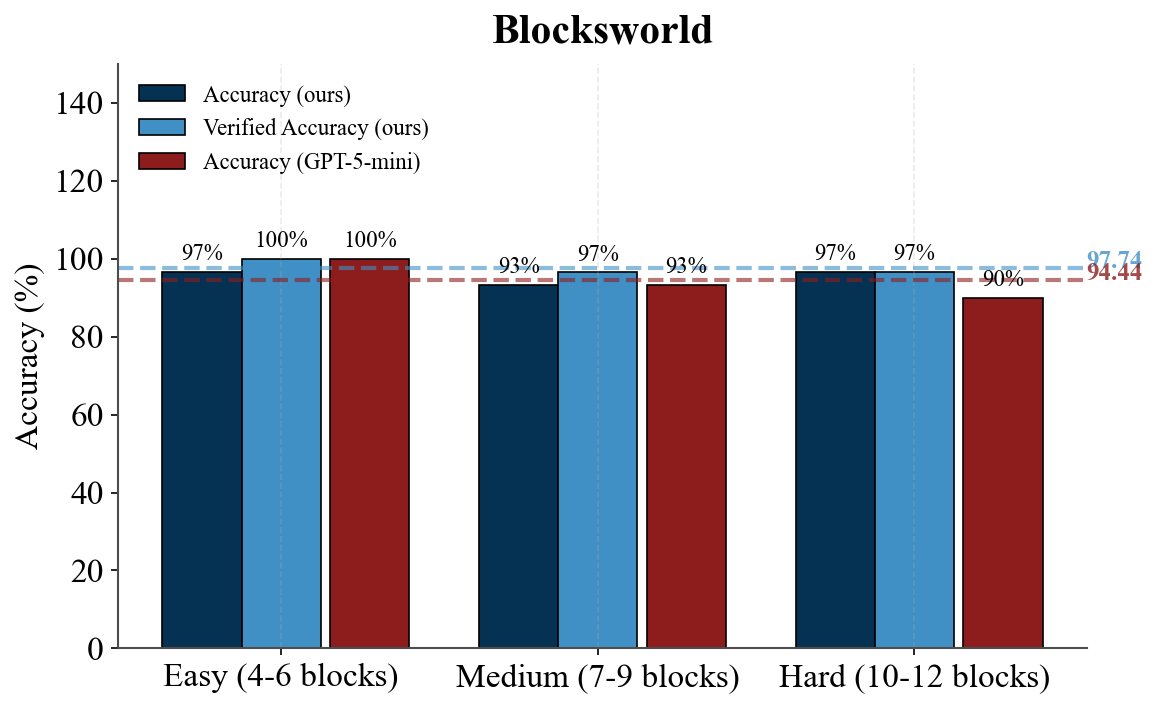

In [18]:
# ============================
# 3 Blocksworld -- easy, medium, hard --
# ============================
with open(f"./results/{model}/_accuracies/accuracy_pddl.json", "r") as f:
    data_pddl = json.load(f)
with open(f"./results/{model}/_accuracies/accuracy_vanilla.json", "r") as f:
    data_vanilla = json.load(f)
    
data_pddl = {d["dataset"]: {"accuracy": d["accuracy"], 
                            "accuracy_plan_paths_existing": d["accuracy_plan_paths_existing"]} 
             for d in data_pddl}
data_vanilla = {d["dataset"]: {"accuracy": d["accuracy"]}
                    for d in data_vanilla}

results_json_names = ["blocksworld_easy_optimal", "blocksworld_medium_optimal", "blocksworld_hard_optimal"]
ours_abs, ours_exec, vanilla_acc  = [], [], []
for d_name in results_json_names:
    ours_abs.append(data_pddl[d_name]["accuracy"] * 100)
    ours_exec.append(data_pddl[d_name]["accuracy_plan_paths_existing"] * 100)
    vanilla_acc.append(data_vanilla[d_name]["accuracy"] * 100)
    
tasks_planbench = ["Easy (4-6 blocks)", "Medium (7-9 blocks)", "Hard (10-12 blocks)"]
x2 = np.arange(len(tasks_planbench))
width2 = 0.25

fig2, ax2 = plt.subplots()

bars1 = ax2.bar(x2 - width2, ours_abs, width2, label="Accuracy (ours)",
                color=ours_abs_color, edgecolor=edge_color, linewidth=0.8)
bars2 = ax2.bar(x2, ours_exec, width2, label="Verified Accuracy (ours)",
                color=ours_exec_color, edgecolor=edge_color, linewidth=0.8)
bars3 = ax2.bar(x2 + width2 + 0.03, vanilla_acc, width2, label="Accuracy (GPT-5-mini)",
                color=baseline_color, edgecolor=edge_color, linewidth=0.8)

ax2.set_ylabel("Accuracy (%)", fontsize=16)
ax2.set_title("Blocksworld", fontsize=20, pad=10)
ax2.set_xticks(x2)
ax2.set_xticklabels(tasks_planbench, rotation=0, ha="center")
ax2.legend(fontsize=11, loc="upper left")
ax2.grid(axis="y")
ax2.set_ylim(0, 150)

# Value labels
for container in [bars1, bars2, bars3]:
    ax2.bar_label(container, fmt="%.0f%%", padding=3, fontsize=11, color="black")

# Average lines
for y, c in zip(np.mean([ours_exec, vanilla_acc], axis=1),
                [ours_exec_color, baseline_color]):
    ax2.axhline(y, color=c, linestyle='--', linewidth=2, alpha=0.6)
    
    # Add value label on the line
    ax2.text(
        x=ax2.get_xlim()[1],       # place at right edge of plot
        y=y,                       # at the same height as the line
        s=f'{y:.2f}',              # format value
        color=c,                   # match line color
        fontsize=12, fontweight='bold',
        alpha=0.8
    )
    
plt.tight_layout()
plt.show()